<a href="https://colab.research.google.com/github/GaikwadSandesh/HotelBookingAnalysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alma_better/EDA _Project/Hotel _Bookings.csv')

In [4]:
dataframe.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Data cleaning and Null value handling

In [5]:
dataframe.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
print(round(100*(dataframe.isnull().sum()/len(dataframe.index)),2))

hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.41
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.69
company                           94.31


Handling Null vaules - 
We can use most comman value for children and country.

94 percent data is missing for company value and 13.69 percent data is missing for agents

We will drop the company column straight away as it is missing most value , 

For the agent column we will do small analysis at the end and for now we can drop that column also

In [7]:
df = dataframe.drop(columns =['company' , 'agent'])

In [8]:
df.fillna(df.mode().iloc[0] , inplace = True)

### we will inspect each column now and keep only those columns which are related to cancellation of booking

## hotel column

In [9]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

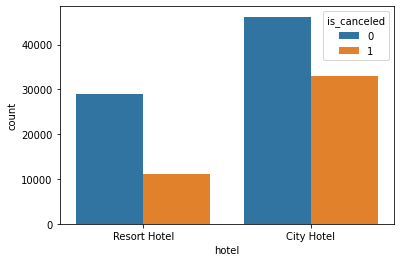

In [10]:
ax = sns.countplot(x = 'hotel' , data=df , hue='is_canceled')

## Modify date 


we will convert arrivel date month ,  date and year as one date column to make data redable . and drop the old columns

In [11]:
df['arrival_date'] = df['arrival_date_day_of_month'].astype(str) + '-' + df['arrival_date_month'].astype(str) + '-' +df['arrival_date_year'].astype(str)
df['arrival_date']= pd.to_datetime(df['arrival_date'])

In [12]:
df.drop(columns=['arrival_date_day_of_month' , 'arrival_date_month' ,'arrival_date_year' , 'arrival_date_week_number' , 'reservation_status_date' ], inplace = True)

##Meal column

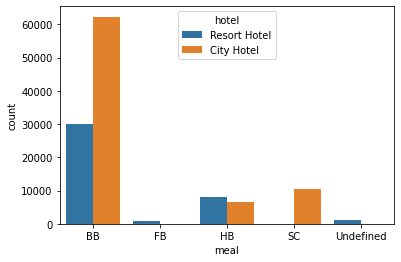

In [13]:
ax1 = sns.countplot(x = 'meal' , data=df, hue='hotel')

In [14]:
df.drop(columns = ['meal'], inplace= True)

Meal can only mesure quality of service both hotels offers all standered meal packages and this parameter will be applicable for repeat custmores only . and this parametere will be taen into account with cancelaltion of repeat custmores so we can eliminitate this column for time being . we can check cancellation for each meal time and rate of cancellation for for repeat cusmoers but that will be too naive to assme only meal parameter is of concern for cancellation of repeat custmoer

##Columns related to number of peoples

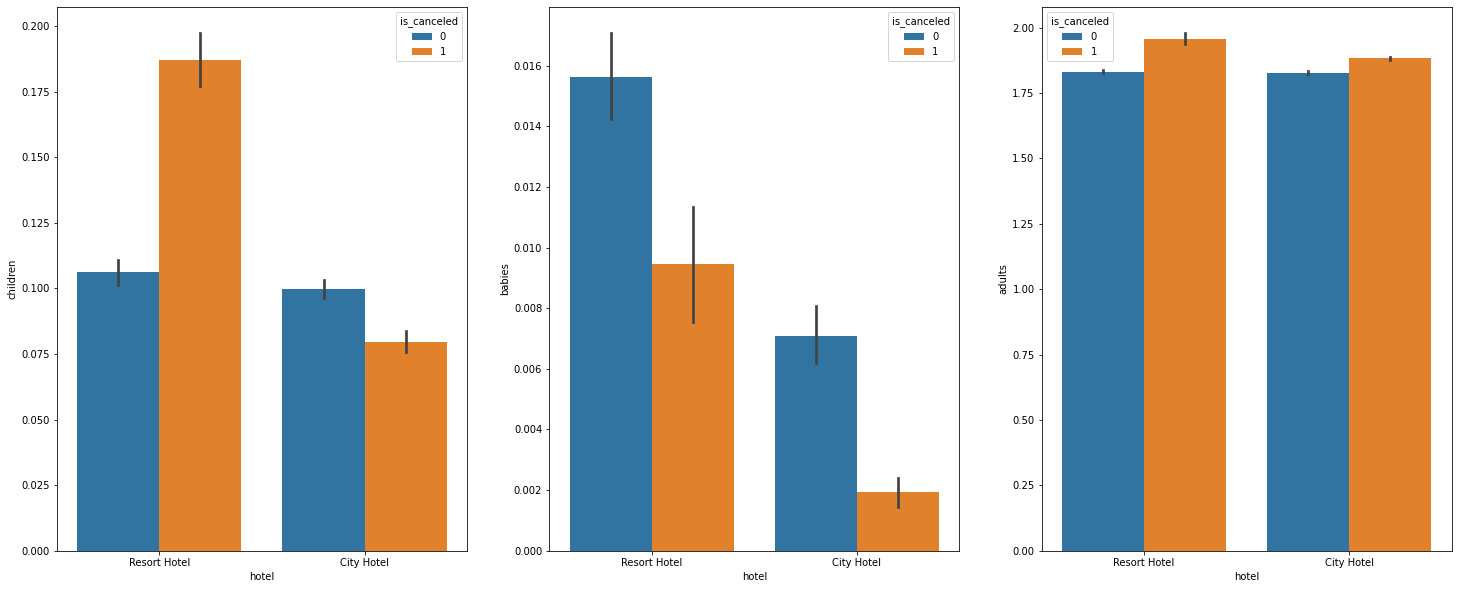

In [15]:
fig , axis =plt.subplots(1, 3, figsize=(25,10))
sns.barplot(y = 'children', x= 'hotel', data=df, hue='is_canceled' , ax=axis[0] )
sns.barplot(y = 'babies',   x= 'hotel', data=df, hue='is_canceled' , ax =axis[1])
sns.barplot(y = 'adults',   x= 'hotel', data=df, hue='is_canceled' , ax =axis[2] )

In [16]:
df.drop(columns = ['children' , 'babies' , 'adults'], inplace= True)

Number of children , babies, adults has nothig to do with cancellation rate there is more cancellation for higher adults but its already captured in market segment category we can drop these coulums 

one thing is noticable that resort hotel has higher  cancellation for couples with kids and they should consider improving  children facility . 
firther quntitative anylysis is not possible with this data

## weekday weekend stay

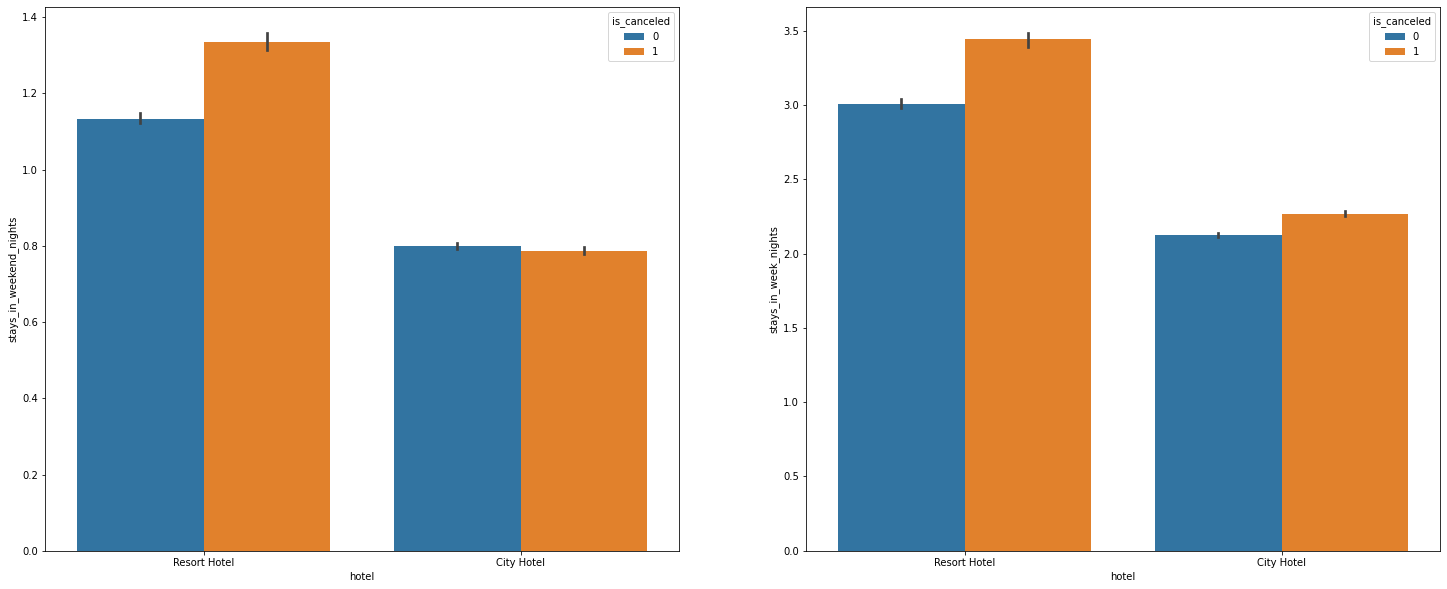

In [21]:
fig , axis =plt.subplots(1, 2, figsize=(25,10))
sns.barplot(y = 'stays_in_weekend_nights', x= 'hotel', data=df, hue='is_canceled' , ax=axis[0] )
sns.barplot(y = 'stays_in_week_nights',   x= 'hotel', data=df, hue='is_canceled' , ax =axis[1])

avg stats for cancelled and not canceled booking is almost same so there is no point in further analuyssis of this data . we can drop this two columns

In [22]:
df.drop(columns = ['stays_in_weekend_nights' , 'stays_in_week_nights'], inplace= True)

## new data

In [23]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'arrival_date'],
      dtype='object')

In [ ]:
repeat_guest_df = df.groupby(['is_canceled' , 'hotel'])['is_repeated_guest'].value_counts().to_frame()

In [ ]:
repeat_guest_df

is_repeated_guest
is_canceled hotel        is_repeated_guest                   
0           City Hotel   0                              44637
                         1                               1591
            Resort Hotel 0                              27271
                         1                               1667
1           City Hotel   0                              32661
                         1                                441
            Resort Hotel 0                              11011
                         1                                111

In [ ]:
#percentage cancellation by non repeat guest
non_repeated_cancel= (43672)/(71908+43672) 
repeated_cancel = (552)/(552+3258)
print('perecntage cancelation by repeated guest : ' , repeated_cancel)
print('perecntage cancelation by non repeated guest : ' , non_repeated_cancel)

perecntage cancelation by repeated guest :  0.14488188976377953
perecntage cancelation by non repeated guest :  0.3778508392455442


we will convert arrivel date month ,  date and year as one date column to make data redable . and drop the old columns

In [ ]:
df['arrival_date'] = df['arrival_date_day_of_month'].astype(str) + '-' + df['arrival_date_month'].astype(str) + '-' +df['arrival_date_year'].astype(str)
df['arrival_date']= pd.to_datetime(df['arrival_date'])

In [ ]:
df.drop(columns=['arrival_date_day_of_month' , 'arrival_date_month' ,'arrival_date_year'], inplace = True)

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'arrival_date'],
      dtype='object')

In [ ]:
df.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,arrival_date
0,Resort Hotel,0,342,0,0,PRT,Direct,Direct,0,0,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,0,0,PRT,Direct,Direct,0,0,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,0,1,GBR,Direct,Direct,0,0,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-01
3,Resort Hotel,0,13,0,1,GBR,Corporate,Corporate,0,0,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-01
4,Resort Hotel,0,14,0,2,GBR,Online TA,TA/TO,0,0,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-01


In [ ]:
df['previous_cancellations'].value_counts()

0     112906
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

In [ ]:
car_park_df = df.groupby(['is_canceled' , 'hotel'])['required_car_parking_spaces'].value_counts().to_frame()
car_park_df

required_car_parking_spaces
is_canceled hotel        required_car_parking_spaces                             
0           City Hotel   0                                                  44302
                         1                                                   1921
                         2                                                      3
                         3                                                      2
            Resort Hotel 0                                                  23448
                         1                                                   5462
                         2                                                     25
                         8                                                      2
                         3                                                      1
1           City Hotel   0                                                  33102
            Resort Hotel 0                                                  11122

we can see car paking is not an issue and can be dropped as all the cancellation are from those who don't need car parking

In [ ]:
special_request_df = df.groupby(['is_canceled' , 'hotel'])['total_of_special_requests'].value_counts().to_frame()
special_request_df

total_of_special_requests
is_canceled hotel        total_of_special_requests                           
0           City Hotel   0                                              21617
                         1                                              16699
                         2                                               6403
                         3                                               1307
                         4                                                177
                         5                                                 25
            Resort Hotel 0                                              15145
                         1                                               9209
                         2                                               3700
                         3                                                744
                         4                                                127
                         5                                                 13
1           City Hotel   0                                              26340
                         1                                               4721
                         2                                               1739
                         3                                                280
                         4                                                 21
                         5                                                  1
            Resort Hotel 0                                               7216
                         1                                               2597
                         2                                               1127
                         3                                                166
                         4                                                 15
                         5                                                  1

we can see the cancellation is not increseing as the special request increse so for now we can drop the column

In [ ]:
df.drop(columns=['required_car_parking_spaces','total_of_special_requests'], inplace = True)

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr', 'reservation_status',
       'arrival_date'],
      dtype='object')

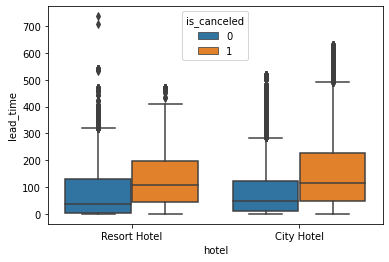

In [52]:
ax = sns.boxplot(y = 'lead_time', x= 'hotel', data=df, hue='is_canceled' )

In [ ]:
country_df = df.groupby(['country'])
country_df.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,reservation_status,arrival_date
0,Resort Hotel,0,342,0,0,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,0,0,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,0,1,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,Check-Out,2015-07-01
3,Resort Hotel,0,13,0,1,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,Check-Out,2015-07-01
4,Resort Hotel,0,14,0,2,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,Check-Out,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117944,City Hotel,0,3,0,2,LAO,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,180.0,Check-Out,2017-08-10
118055,City Hotel,0,5,1,0,PRY,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,89.0,Check-Out,2017-08-13
118247,City Hotel,0,45,0,1,COM,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,0,Transient,259.0,Check-Out,2017-08-16
118366,City Hotel,0,77,0,4,ETH,Direct,Direct,0,0,0,D,A,0,No Deposit,0,Transient,111.8,Check-Out,2017-08-15


# First we will plot uniqe values from each column so that we get better understand the data 